Подключение библиотек:

In [3]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

1-2:
Создание списка путей к картинкам, разделение на выборки:

In [11]:
images_list = []
images_list = glob.glob(os.path.join('C:/Users/user/Desktop/dataset1','*.jpg'))
train_list = images_list[0 : int(len(images_list)*0.8)]
test_list = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_list = images_list[int(len(images_list)*0.9) : int(len(images_list))]

Проверка:

In [12]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

292
['C:/Users/user/Desktop/dataset1\\bay horse_0000.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0001.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0002.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0003.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0004.jpg']
233
['C:/Users/user/Desktop/dataset1\\bay horse_0000.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0001.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0002.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0003.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0004.jpg']
29
['C:/Users/user/Desktop/dataset1\\zebra_0019.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0020.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0021.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0022.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0023.jpg']
30
['C:/Users/user/Desktop/dataset1\\zebra_0057.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0058.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0059.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_006

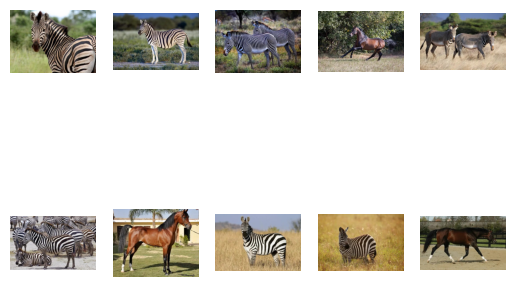

In [13]:
random_idx = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off')


plt.show()

Класс Dataset
метки 0 - zebra, 1 - bay horse

In [14]:
class Dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('/')[-1].split('.')[1]
        if label == 'zebra':
            label=0
        elif label == 'bay horse':
            label=1
        #print(label)  
            
        return img_transformed,label